<a href="https://colab.research.google.com/github/google/applied-machine-learning-intensive/blob/master/content/04_classification/04_classification_project/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification Project

In this project you will apply what you have learned about classification and TensorFlow to complete a project from Kaggle. The challenge is to achieve a high accuracy score while trying to predict which passengers survived the Titanic ship crash. After building your model, you will upload your predictions to Kaggle and submit the score that you get.

## The Titanic Dataset

[Kaggle](https://www.kaggle.com) has a [dataset](https://www.kaggle.com/c/titanic/data) containing the passenger list on the Titanic. The data contains passenger features such as age, gender, ticket class, as well as whether or not they survived.

Your job is to create a binary classifier using TensorFlow to determine if a passenger survived or not. The `Survived` column lets you know if the person survived. Then, upload your predictions to Kaggle and submit your accuracy score at the end of this Colab, along with a brief conclusion.


To get the dataset, you'll need to accept the competition's rules by clicking the "I understand and accept" button on the [competition rules page](https://www.kaggle.com/c/titanic/rules). Then upload your `kaggle.json` file and run the code below.

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! ls

kaggle.json
Done
train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


**Note: If you see a "403 - Forbidden" error above, you still need to click "I understand and accept" on the [competition rules page](https://www.kaggle.com/c/titanic/rules).**

Three files are downloaded:

1. `train.csv`: training data (contains features and targets)
1. `test.csv`: feature data used to make predictions to send to Kaggle
1. `gender_submission.csv`: an example competition submission file

## Step 1: Exploratory Data Analysis

Perform exploratory data analysis and data preprocessing. Use as many text and code blocks as you need to explore the data. Note any findings. Repair any data issues you find.

**Student Solution**

In [ ]:
# Your code goes here
import pandas as pd
import numpy as np


df_train = pd.read_csv("train.csv")
print(df_train.describe(include='all'))
df_train.shape

        PassengerId    Survived      Pclass  ...        Fare    Cabin  Embarked
count    891.000000  891.000000  891.000000  ...  891.000000      204       889
unique          NaN         NaN         NaN  ...         NaN      147         3
top             NaN         NaN         NaN  ...         NaN  B96 B98         S
freq            NaN         NaN         NaN  ...         NaN        4       644
mean     446.000000    0.383838    2.308642  ...   32.204208      NaN       NaN
std      257.353842    0.486592    0.836071  ...   49.693429      NaN       NaN
min        1.000000    0.000000    1.000000  ...    0.000000      NaN       NaN
25%      223.500000    0.000000    2.000000  ...    7.910400      NaN       NaN
50%      446.000000    0.000000    3.000000  ...   14.454200      NaN       NaN
75%      668.500000    1.000000    3.000000  ...   31.000000      NaN       NaN
max      891.000000    1.000000    3.000000  ...  512.329200      NaN       NaN

[11 rows x 12 columns]


(891, 12)

In [ ]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df_train[df_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


---

In [ ]:
df_train[df_train.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
df_train[df_train.Cabin.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df_train = df_train.drop('Cabin', axis=1)
mean_age = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].replace(np.nan, mean_age)
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna(method='ffill')
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df_train = df_train.drop(['Name','Ticket'], axis=1)

df_train= pd.get_dummies(df_train, columns=['Sex', 'Embarked'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_train = df_train.drop('PassengerId', axis=1)


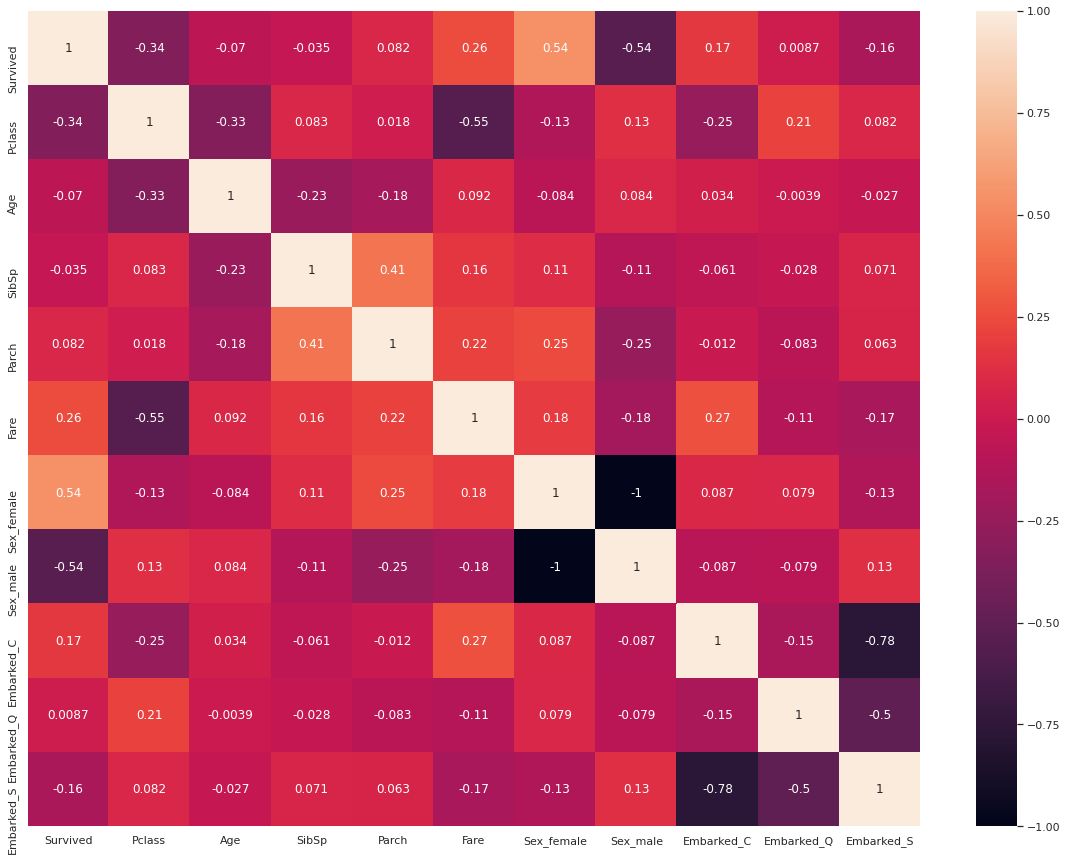

In [ ]:
sns.set(style="white")
# Create a covariance matrix
corr = df_train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True)

## Step 2: The Model

Build, fit, and evaluate a classification model. Perform any model-specific data processing that you need to perform. If the toolkit you use supports it, create visualizations for loss and accuracy improvements. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

### Neural Networks Model

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

# Your code goes here
x = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

model = keras.Sequential([
                          keras.layers.Dense(64, input_shape=[10]),
                          keras.layers.Dense(32, activation='relu'),
                          tf.keras.layers.Dense(1, activation='sigmoid')
                          ])
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x, y, epochs=100)

Epoch 1/100
28/28 [==============================] - 3s 2ms/step - loss: 2.3368 - accuracy: 0.5947
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7378
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.6846
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7467 - accuracy: 0.7059
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7672
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7608
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7623
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7793
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7718
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5123 - accuracy: 0.7762
Epoch 11/

---

## Step 3: Make Predictions and Upload To Kaggle

In this step you will make predictions on the features found in the `test.csv` file and upload them to Kaggle using the [Kaggle API](https://github.com/Kaggle/kaggle-api). Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

### Predictions with Neural Networks Model

In [ ]:
# Your code goes here
import pandas as pd

df_test = pd.read_csv("test.csv")

df_test = df_test.drop('Cabin', axis=1)
mean_age = df_test['Age'].mean()
df_test['Age'] = df_test['Age'].replace(np.nan, mean_age)

df_test['Embarked'] = df_test['Embarked'].fillna(method='ffill')

df_test = df_test.drop(['Name','Ticket'], axis=1)

df_test= pd.get_dummies(df_test, columns=['Sex', 'Embarked'])

In [ ]:
predict = model.predict(df_test.drop('PassengerId', axis=1))

In [ ]:
data_result = {'PassengerID' : df_test['PassengerId'].to_numpy(), 'Survived' : predict.ravel().round().astype(int)}
data_result

{'PassengerID': array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
         903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
         914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
         925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
         936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
         947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
         958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
         969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
         980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
         991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 103

In [ ]:
df_result = pd.DataFrame.from_dict(data_result)

In [ ]:
df_result.to_csv('Titanic Prediction2.csv', index=False)

What was your Kaggle score?

0.7751

---

## Step 4: Iterate on Your Model

In this step you're encouraged to play around with your model settings and to even try different models. See if you can get a better score. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In this exploration, I try to use another machine learning algorithm. There are Logistic Regression and Decision Tree Regresion using GridSearchCV for hyperparameter tuning. Based on the validation score, then I choose Decision Tree Regressor as the model algorithm.

In [ ]:
df_train = df_train.drop('Parch', axis=1)

In [ ]:
x = df_train.drop('Survived', axis=1)
y = df_train['Survived']

### Logistic Regression

In [ ]:
# Your code goes here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_lg = LogisticRegression()

#tuning hyperparameter dengan gscv
param_grid = {'penalty': ['l1', 'l2'], 'solver' : ['liblinear']}
gscv = GridSearchCV(model_lg, param_grid=param_grid, scoring='roc_auc', cv=5)
gscv.fit(x,y)

best_param = gscv.best_params_
print('Kombinasi hyperparameter terbaik :')
print(best_param)
best_score = gscv.best_score_
print('Dengan score validasi terbaik sebagai berikut : ')
print(best_score)

Kombinasi hyperparameter terbaik :
{'penalty': 'l2', 'solver': 'liblinear'}
Dengan score validasi terbaik sebagai berikut : 
0.8517375075279414


In [ ]:
mean_fare = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].replace(np.nan, mean_fare)

### Decision Tree Regressor

In [ ]:
# Your code goes here
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

model_dtg = DecisionTreeRegressor()

#tuning hyperparameter dengan gscv
param_grid = {'max_depth' : np.arange(1,10), 'splitter' : ['best', 'random']}
gscv = GridSearchCV(model_dtg, param_grid=param_grid, scoring='roc_auc', cv=5)
gscv.fit(x,y)

best_param = gscv.best_params_
print('Kombinasi hyperparameter terbaik :')
print(best_param)
best_score = gscv.best_score_
print('Dengan score validasi terbaik sebagai berikut : ')
print(best_score)

Kombinasi hyperparameter terbaik :
{'max_depth': 5, 'splitter': 'best'}
Dengan score validasi terbaik sebagai berikut : 
0.8543594930919314


In [ ]:
model_dtg = DecisionTreeRegressor(max_depth=5, splitter='best')
model_dtg.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
predict_Survived = model_dtg.predict(df_test.drop(['PassengerId', 'Parch'], axis=1))

In [ ]:
predict_Survived

array([0.10123457, 0.        , 0.10123457, 0.10123457, 0.52631579,
       0.10123457, 0.71698113, 0.10123457, 0.71698113, 0.10123457,
       0.10123457, 0.        , 1.        , 0.10123457, 1.        ,
       0.91176471, 0.10123457, 0.10123457, 0.52631579, 0.        ,
       0.14285714, 0.33333333, 1.        , 0.4494382 , 0.94444444,
       0.10123457, 1.        , 0.10123457, 0.4494382 , 0.10123457,
       0.10123457, 0.10123457, 0.52631579, 0.04545455, 0.4494382 ,
       0.10123457, 0.52631579, 0.52631579, 0.10123457, 0.71428571,
       0.10123457, 0.4494382 , 0.10123457, 0.91176471, 1.        ,
       0.10123457, 0.4494382 , 0.10123457, 1.        , 0.52631579,
       0.4494382 , 0.10123457, 0.91176471, 0.94444444, 0.10123457,
       0.33333333, 0.10123457, 0.10123457, 0.10123457, 0.94444444,
       0.10123457, 0.10123457, 0.10123457, 0.71698113, 0.4494382 ,
       0.91176471, 0.71698113, 0.4494382 , 0.4494382 , 0.94444444,
       0.71698113, 0.10123457, 0.52631579, 0.4494382 , 0.94444

In [ ]:
data_result2 = {'PassengerID' : df_test['PassengerId'].to_numpy(), 'Survived' : predict_Survived.round().astype(int)}
data_result2

{'PassengerID': array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
         903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
         914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
         925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
         936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
         947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
         958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
         969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
         980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
         991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 103

---

In [ ]:
df_result_decisiontreeregressor = pd.DataFrame.from_dict(data_result2)

df_result.to_csv('Titanic_decisiontreeregressor.csv', index=False)